# **The Sparks Foundation #GRIPAUG'2021'**

### **Syed Mustafa Data Science and Business Analytics Intern**

# Task 1- Prediction using Supervised Machine Learning

### **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## Problem statement - what will be the predicted score if student studies for 9.25 hrs/day?

### Importing libraries

In [148]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


### Importing Data Set

In [157]:
dataset= 'http://bit.ly/w-data'
df=pd.read_csv(dataset)

### Reading Data Set

In [158]:
print("Data imported")
print(" ")
print("First 10 Data are displayed")


df.head(10)

Data imported
 
First 10 Data are displayed


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Visualizing Dataset through Scatter Plot

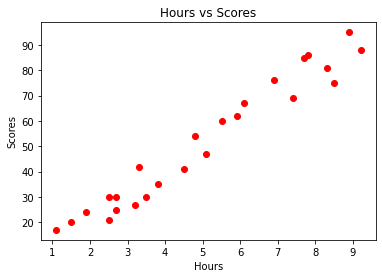

In [129]:
# Plotting the distribution of scores
x=df['Hours']
y=df['Scores']

plt.title('Hours vs Scores')  
plt.xlabel('Hours')  
plt.ylabel('Scores')
plt.scatter(x,y,color='red')
#plt.plot(x,y,'o')
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

## **Preparing the data**



### Converting Dataframe into Array

In [130]:
x=np.array(df['Hours']).reshape(-1,1)
y=np.array(df['Scores']).reshape(-1,1)

### Sptlitting given Dataset into training dataset and test dataset

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [131]:
#from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2,random_state=0) 

In [132]:
print('The values in X_train are: ',X_train)
print('The values in y_train are: ',y_train)

The values in X_train are:  [[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]
The values in y_train are:  [[35]
 [24]
 [86]
 [76]
 [17]
 [47]
 [85]
 [42]
 [81]
 [88]
 [67]
 [30]
 [25]
 [60]
 [30]
 [75]
 [21]
 [54]
 [95]
 [41]]


## **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [138]:
#from sklearn.linear_model import LinearRegression  
lm = LinearRegression()  
lm.fit(X_train, y_train) 

print("Training complete")

Training complete


#### Value of Scope

In [139]:
coef=lm.coef_
coef=coef.reshape(-1)
coef

array([9.91065648])

#### Intercept

In [140]:
intercept=lm.intercept_ 
intercept

array([2.01816004])

### Best-fit-line equation

In [141]:
def myfunc(slope, intercept):
    axes= plt.gca()
    x_vals=np.array(axes.get_xlim())
    y_vals=intercept+slope*x_vals
    plt.plot(x_vals,y_vals,'--',color='black')

## Plotting the Regression line

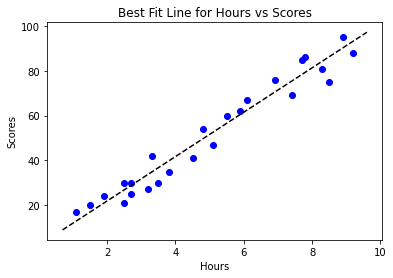

In [142]:
plt.scatter(x,y,color='blue')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Best Fit Line for Hours vs Scores')
myfunc(coef,intercept)

## **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [143]:
y_pred = lm.predict(X_test) # Predicting the scores
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

### Comparing Actual vs Predicted


In [144]:
y_test1=list(y_test)
y_pred1=list(y_pred)
df1=pd.DataFrame({'Actual':y_test1,'Predicted':y_pred1})
df1

,Actual,Predicted
0,[20],[16.884144762398037]
1,[27],[33.73226077948984]
2,[69],[75.35701799818723]
3,[30],[26.794801243040276]
4,[62],[60.491033277223885]


### Accuracy of our Model


In [145]:
metrics.r2_score(y_test,y_pred)


0.9454906892105356

### The Predicted score

In [146]:

own_pred=lm.predict([[9.25]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = [93.69173249]


## **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [147]:
  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


# The predicted score of a student if he studies for 9.25hrs/day is 93.69 %